In [1]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np

In [3]:
dl = DataLib("SignalData")

## Monetary Base

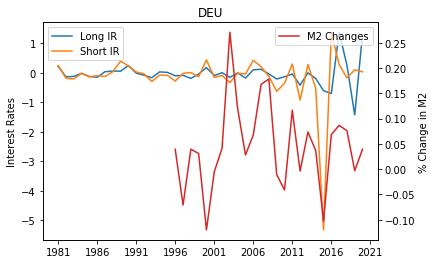

long rate correlation: 0.18677914054007136
short rate correlation: 0.3566645739733677


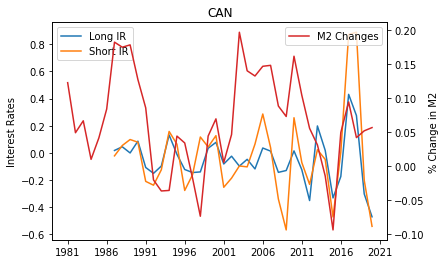

long rate correlation: 0.22848838690678164
short rate correlation: 0.21886983068738736


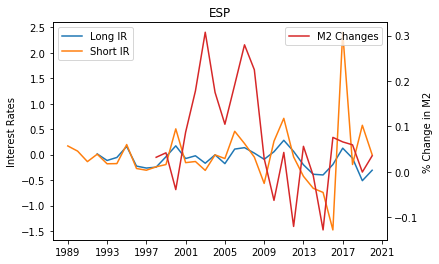

long rate correlation: 0.24539530917099905
short rate correlation: 0.04719378800509094


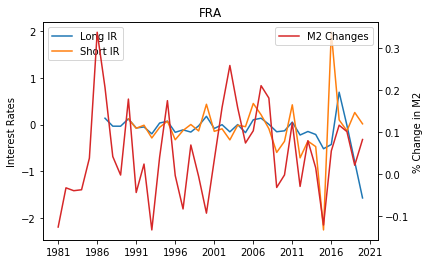

long rate correlation: 0.22914653409879643
short rate correlation: 0.3283351295370151


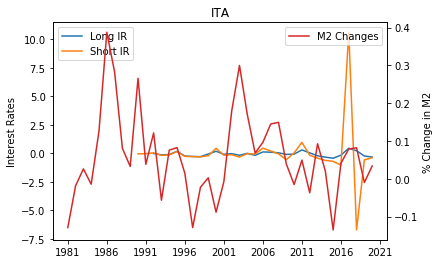

long rate correlation: 0.30364354600746307
short rate correlation: 0.04076880333093717


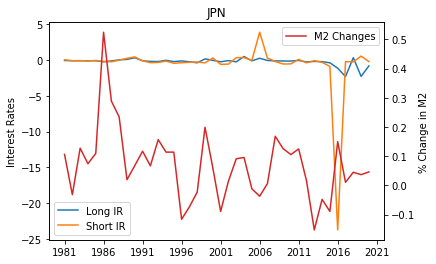

long rate correlation: 0.0848289848243491
short rate correlation: -0.12189859660509177


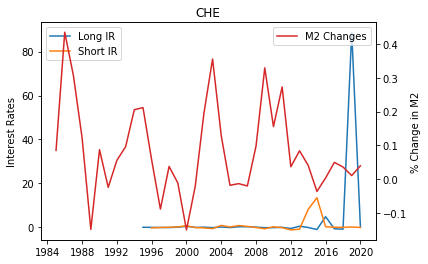

long rate correlation: -0.1028731646307858
short rate correlation: -0.23287849943379485


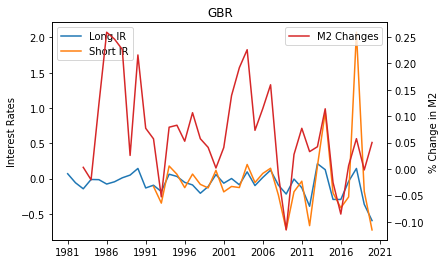

long rate correlation: 0.41352099139726034
short rate correlation: 0.35438105240926915


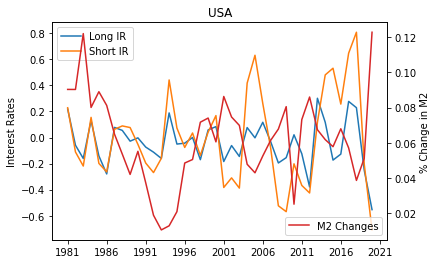

long rate correlation: -0.3716045160909486
short rate correlation: -0.3992460727210959


In [19]:
m1 = dl.pull('M1/inUSD')
m2 = dl.pull('M2/inUSD')
m3 = dl.pull('M3/inUSD')
changes_in_m2 = m2.resample('Y').mean().pct_change()
cum_changes_in_m2 = changes_in_m2.cumsum()

long_interest_rates = dl.pull('LongRates').resample('Y').mean()
short_interest_rates = dl.pull('ShortRates').resample('Y').mean()
change_long_rates = long_interest_rates.pct_change()
change_short_rates = short_interest_rates.pct_change()

for country in m1.columns:
    if country not in ['AUS']:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(change_long_rates[country].to_timestamp(), label = 'Long IR')
        ax1.plot(change_short_rates[country].to_timestamp(), label = 'Short IR')
        ax1.set_ylabel('Interest Rates')
        ax1.legend()
        ax2.plot(changes_in_m2[country].to_timestamp(), color = 'tab:red', label = 'M2 Changes')
        ax2.set_ylabel('% Change in M2')
        ax2.legend()
        plt.title(country)
        plt.show()
        print('long rate correlation: ' + str(change_long_rates[country].corr(changes_in_m2[country])))
        print('short rate correlation: ' + str(change_short_rates[country].corr(changes_in_m2[country])))


## Fx Appreciation

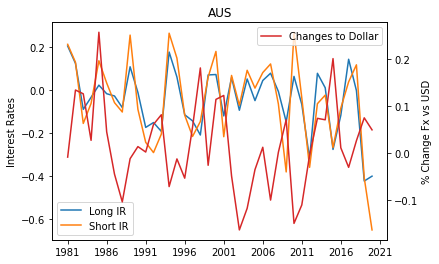

long rate correlation: -0.28644724467669547
short rate correlation: -0.29125630259362595


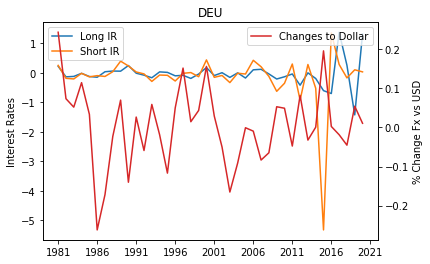

long rate correlation: -0.13229301547805192
short rate correlation: -0.28244728825257426


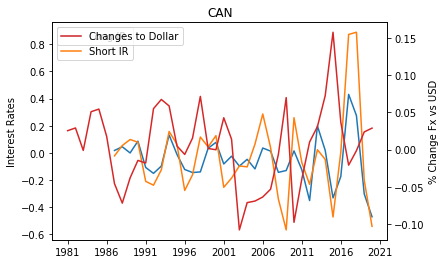

long rate correlation: -0.28890030259649935
short rate correlation: -0.3572372413878009


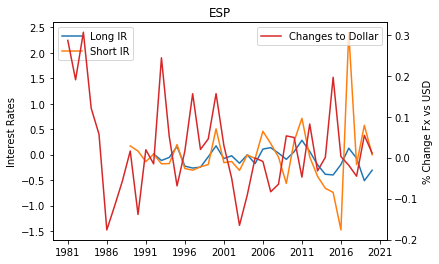

long rate correlation: -0.27035602848152224
short rate correlation: -0.1285422864505922


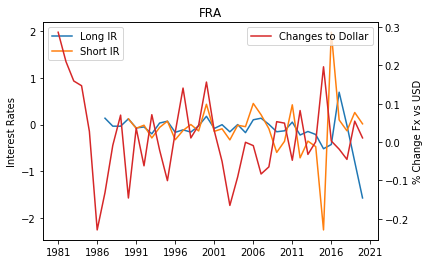

long rate correlation: -0.271162758366769
short rate correlation: -0.33760291205598303


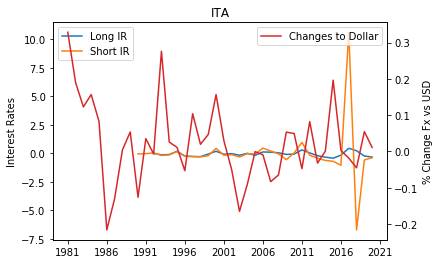

long rate correlation: -0.2428601127283926
short rate correlation: -0.017436883739989098


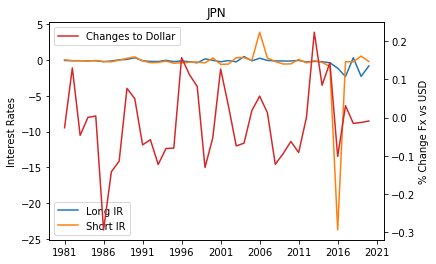

long rate correlation: -0.04509985277943617
short rate correlation: 0.1489382442797285


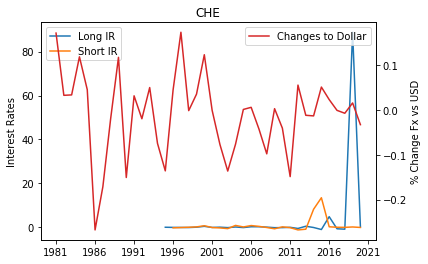

long rate correlation: 0.07683596776917855
short rate correlation: 0.14486389690911985


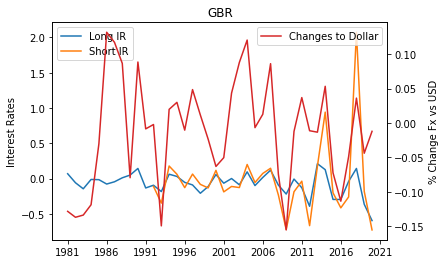

long rate correlation: 0.3096541955310989
short rate correlation: 0.45514765644396576


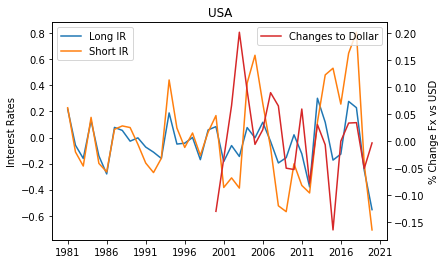

long rate correlation: 0.1749081216517828
short rate correlation: -0.11292071466715135


In [21]:
fxVsUSD = dl.pull('fxVsUSD')
yearlyFxVsUSD = fxVsUSD.resample('Y').mean()
yearlyChangeFxVsUSD = yearlyFxVsUSD.pct_change()

long_interest_rates = dl.pull('LongRates').resample('Y').mean()
short_interest_rates = dl.pull('ShortRates').resample('Y').mean()
change_long_rates = long_interest_rates.pct_change()
change_short_rates = short_interest_rates.pct_change()

for country in m1.columns:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(change_long_rates[country].to_timestamp(), label = 'Long IR')
    ax1.plot(change_short_rates[country].to_timestamp(), label = 'Short IR')
    ax1.set_ylabel('Interest Rates')
    ax1.legend()
    ax2.plot(yearlyChangeFxVsUSD[country].to_timestamp(), color = 'tab:red',label = 'Changes to Dollar')
    ax2.set_ylabel('% Change Fx vs USD')
    ax2.legend()
    plt.title(country)
    plt.show()
    print('long rate correlation: ' + str(change_long_rates[country].corr(yearlyChangeFxVsUSD[country])))
    print('short rate correlation: ' + str(change_short_rates[country].corr(yearlyChangeFxVsUSD[country])))


In [198]:
'''
takes in indicator. Then processes return and plots bond return, indicator, and pnl
indicator is a function, returns new time series with the indicator

CURRENTLY ONLY DOING FOR USA
'''
bond_return_index = dl.pull('BondRetIdx/LocalFX')
bond_return_change = bondReturnIndex.resample('M').mean().pct_change()


def evaluate_performance(indicator):
    shifted_bond_return = bond_return_change.shift(1)
    days_profit = shifted_bond_return['USA'] * indicator
    position = indicator.shift(1).cumsum()
    pnl = days_profit.cumsum()
    pnl = pnl * 1000
    return position, pnl
    
    
def plot_evaluation(indicator, pnl, position):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(pnl.to_timestamp(), label = 'Portfolio Returns')
#     ax1.plot(bond_return_index['USA'].to_timestamp(), label = 'Bond Market Index')
    ax1.set_ylabel('Returns or Index')
    ax1.legend()
    ax2.plot(indicator.to_timestamp(), color = 'tab:red',label = 'Indicator')
    ax2.set_ylabel('Indicator')
    ax2.legend()
    plt.title('USA')
    plt.show()
#     position.plot()
#     plt.title('Position')
#     plt.show()


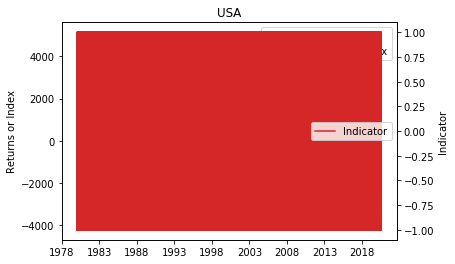

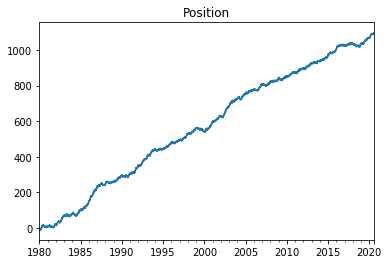

In [187]:
'''
indicator to always know when to short or long
'''
indicator = pd.Series([])
bond_return_index = dl.pull('BondRetIdx/LocalFX')
bond_return_change = bondReturnIndex.pct_change()
back_lag_bond_return = bond_return_change.shift(-1)

for date in back_lag_bond_return.index:
    indicator.loc[date] = 1 if back_lag_bond_return.loc[date]['USA'] > 0 else -1
    
position, pnl = evaluate_performance(indicator)
plot_evaluation(indicator, pnl, position)

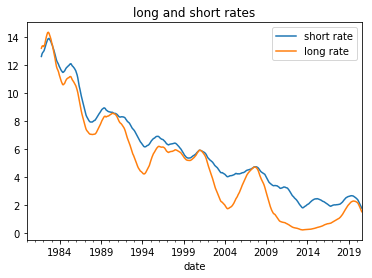

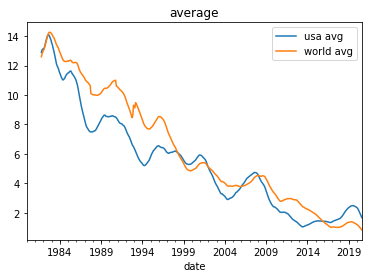

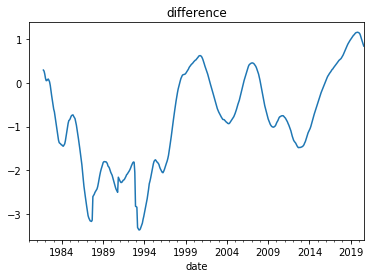

original indicator without lag


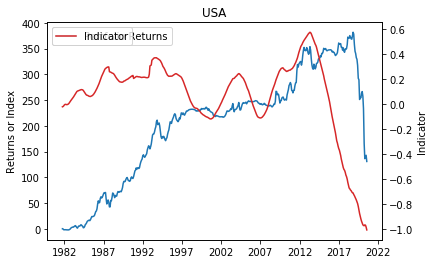

indicator without lag = 3 months


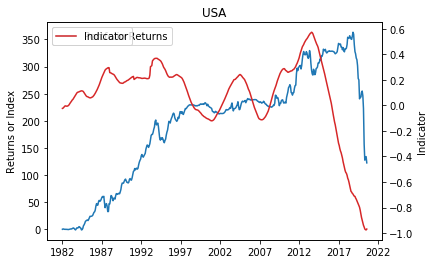

indicator without lag = 6 months


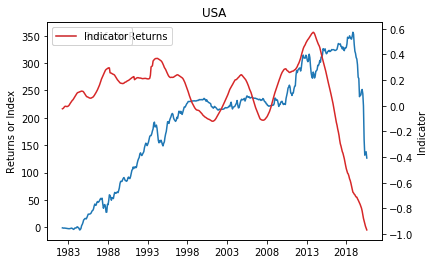

indicator without lag = 9 months


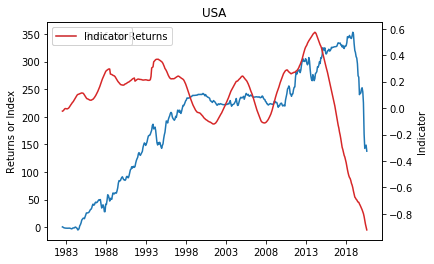

indicator without lag = 36 months


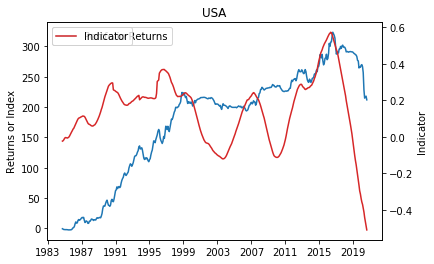

In [199]:
'''
indicator to look at curve height
'''
indicator = pd.Series([])
short_rates = dl.pull('LongRates').rolling(22).mean()
long_rates = dl.pull('ShortRates').rolling(22).mean()
average_long_and_short = (long_rates + short_rates) / 2
average_long_and_short = average_long_and_short.drop(['JPN', 'CHE', 'DEU'], axis=1)
world_average = average_long_and_short.mean(axis = 1)

short_rates['USA'].plot()
long_rates['USA'].plot()
plt.title('long and short rates')
plt.legend(['short rate', 'long rate'])
plt.show()

average_long_and_short['USA'].plot()
world_average.plot()
plt.legend(['usa avg', 'world avg'])
plt.title('average')
plt.show()

diff_usa_vs_world_avg = average_long_and_short['USA'] - world_average
diff_usa_vs_world_avg.plot()
plt.title('difference')
plt.show()

for date in diff_usa_vs_world_avg.index:
    indicator.loc[date] = -diff_usa_vs_world_avg[date]/world_average[date]

print('original indicator without lag')
position, pnl = evaluate_performance(indicator)
plot_evaluation(indicator, pnl, position)

print('indicator without lag = 3 months')
month_3_lag_indicator = indicator.shift(3)
month_3_lag_position, month_3_lag_pnl = evaluate_performance(month_3_lag_indicator)
plot_evaluation(month_3_lag_indicator, month_3_lag_pnl, month_3_lag_position)

print('indicator without lag = 6 months')
month_6_lag_indicator = indicator.shift(6)
month_6_lag_position, month_6_lag_pnl = evaluate_performance(month_6_lag_indicator)
plot_evaluation(month_6_lag_indicator, month_6_lag_pnl, month_6_lag_position)

print('indicator without lag = 9 months')
month_9_lag_indicator = indicator.shift(9)
month_9_lag_position, month_9_lag_pnl = evaluate_performance(month_9_lag_indicator)
plot_evaluation(month_9_lag_indicator, month_9_lag_pnl, month_9_lag_position)

print('indicator without lag = 36 months')
month_36_lag_indicator = indicator.shift(36)
month_36_lag_position, month_36_lag_pnl = evaluate_performance(month_36_lag_indicator)
plot_evaluation(month_36_lag_indicator, month_36_lag_pnl, month_36_lag_position)

In [95]:
'''
test concepts
'''

play_series = pd.Series([100, 200, 0])
change = play_series.pct_change()
print('change')
print(change)
indicator = pd.Series([1, 1, 1])
print('\nindicator')
print(indicator)
position = indicator.shift(1).cumsum()
print('\nposition')
print(position)
bond_return = position * change
print('\nreturn')
print(bond_return)
indicator.loc[indicator.shape[0]] = 1
print('new indicator')
print(indicator)
print(indicator.shape)


change
0    NaN
1    1.0
2   -1.0
dtype: float64

indicator
0    1
1    1
2    1
dtype: int64

position
0    NaN
1    1.0
2    2.0
dtype: float64

return
0    NaN
1    1.0
2   -2.0
dtype: float64
new indicator
0    1
1    1
2    1
3    1
dtype: int64
(4,)


In [100]:
'''
reference on how to create indicators
'''


bond_return_index = dl.pull('BondRetIdx/LocalFX')
indicator = pd.Series([])
print(bond_return_index['USA'].head())
count = 0
for date in bond_return_index.index:
    count += 1
    if count == 5:
        break
    print('date: ' + str(date))
    print(bond_return_index.loc[date]['USA'])
    indicator.loc[date] = 1
    print(indicator)
    print('-------------------------')


date
1980-01-01    37.527
1980-01-02    37.156
1980-01-03    36.941
1980-01-04    36.859
1980-01-07    36.926
Freq: B, Name: USA, dtype: float64
date: 1980-01-01
37.527
1980-01-01    1
Freq: B, dtype: int64
-------------------------
date: 1980-01-02
37.156
1980-01-01    1
1980-01-02    1
Freq: B, dtype: int64
-------------------------
date: 1980-01-03
36.941
1980-01-01    1
1980-01-02    1
1980-01-03    1
Freq: B, dtype: int64
-------------------------
date: 1980-01-04
36.859
1980-01-01    1
1980-01-02    1
1980-01-03    1
1980-01-04    1
Freq: B, dtype: int64
-------------------------


## Fx Appreciation vs GDP Growth

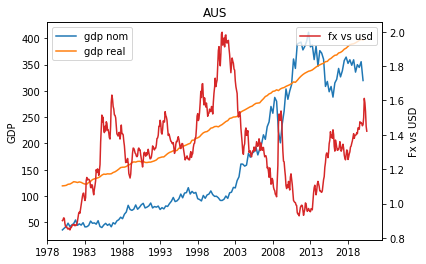

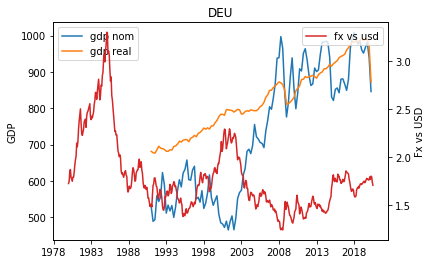

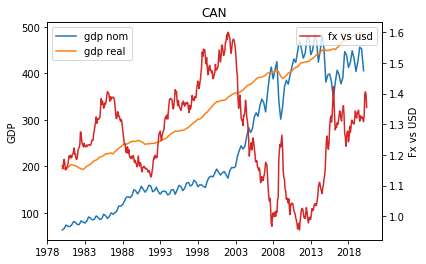

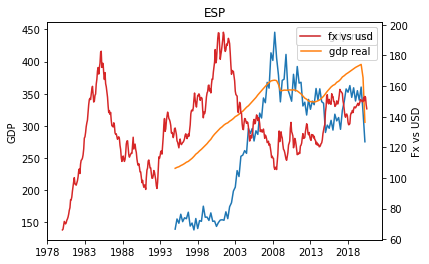

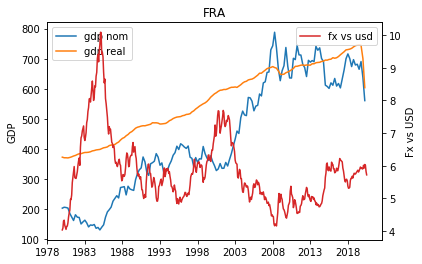

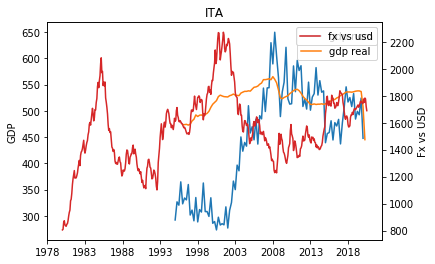

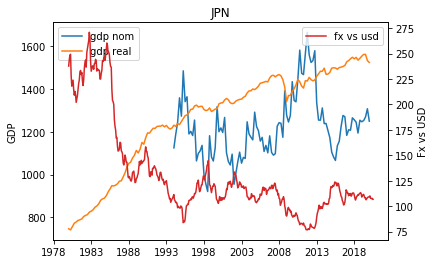

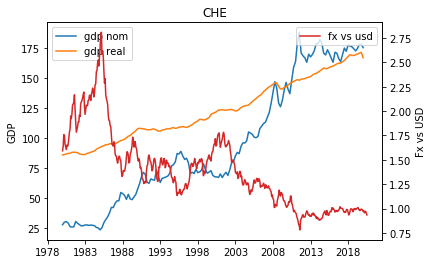

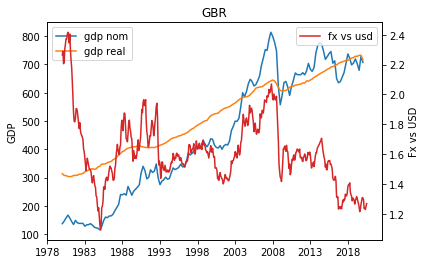

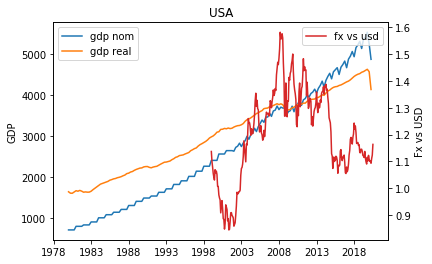

In [200]:
fx_vs_usd = dl.pull('fxVsUSD')
gdp_growth_nom = dl.pull('GDP/Nominal')
gdp_growth_real = dl.pull('GDP/Real')

for country in fx_vs_usd.columns:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(gdp_growth_nom[country].to_timestamp(), label = 'gdp nom')
    ax1.plot(gdp_growth_real[country].to_timestamp(), label = 'gdp real')
    ax1.set_ylabel('GDP')
    ax1.legend()
    ax2.plot(fx_vs_usd[country].to_timestamp(), color = 'tab:red',label = 'fx vs usd')
    ax2.set_ylabel('Fx vs USD')
    ax2.legend()
    plt.title(country)
    plt.show()

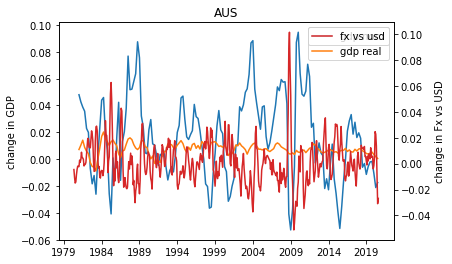

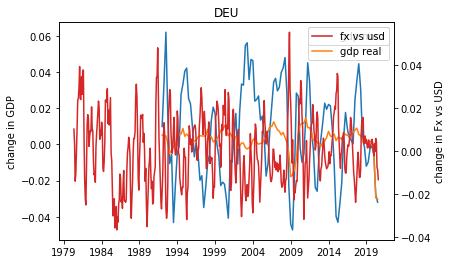

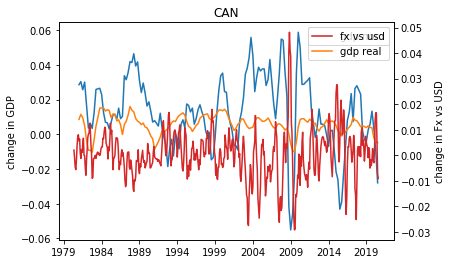

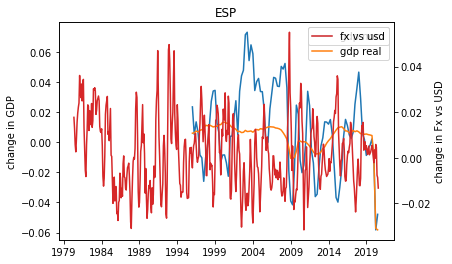

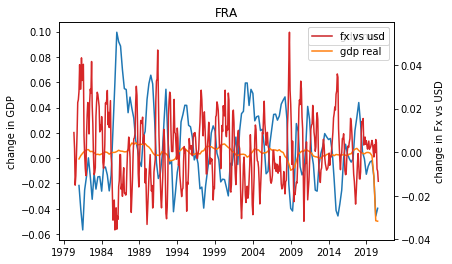

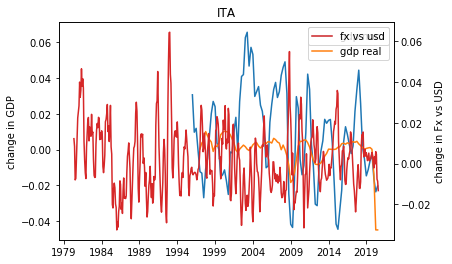

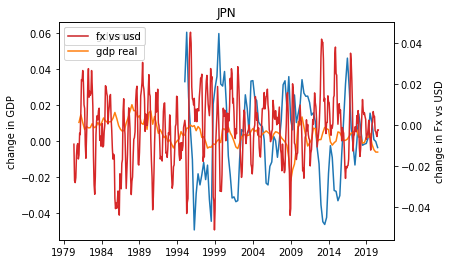

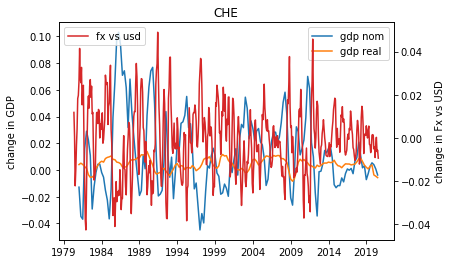

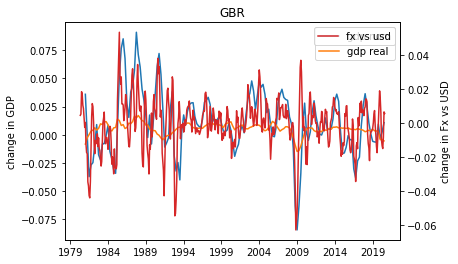

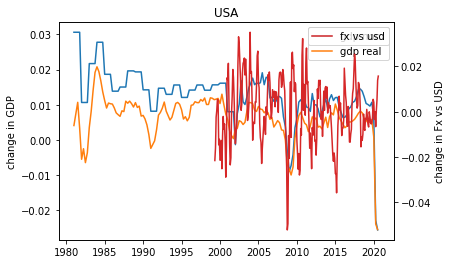

In [202]:
avg_fx_change = fx_vs_usd.pct_change().rolling(4).mean()
avg_gdp_change_nom = gdp_growth_nom.pct_change().rolling(4).mean()
avg_gdp_change_real = gdp_growth_real.pct_change().rolling(4).mean()

for country in fx_vs_usd.columns:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(avg_gdp_change_nom[country].to_timestamp(), label = 'gdp nom')
    ax1.plot(avg_gdp_change_real[country].to_timestamp(), label = 'gdp real')
    ax1.set_ylabel('change in GDP')
    ax1.legend()
    ax2.plot(avg_fx_change[country].to_timestamp(), color = 'tab:red',label = 'fx vs usd')
    ax2.set_ylabel('change in Fx vs USD')
    ax2.legend()
    plt.title(country)
    plt.show()